In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\KIIT\\Downloads')
df=pd.read_csv('KKR vs RCB.csv')
df

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,...,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,...,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",RCB,KKR,2,15.4,...,Vaibhav Arora,4,0,0,0,0,0,NaN,NaN,NaN
219,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",RCB,KKR,2,15.5,...,Vaibhav Arora,0,0,0,0,0,0,NaN,NaN,NaN
220,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",RCB,KKR,2,15.6,...,Vaibhav Arora,1,0,0,0,0,0,NaN,NaN,NaN
221,202501,2025,Group Stage,1,22-Mar-25,"Eden Gardens, Kolkata",RCB,KKR,2,16.1,...,Spencer Johnson,6,0,0,0,0,0,NaN,NaN,NaN


In [15]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          223 non-null    int64  
 1   season            223 non-null    int64  
 2   phase             223 non-null    object 
 3   match_no          223 non-null    int64  
 4   date              223 non-null    object 
 5   venue             223 non-null    object 
 6   batting_team      223 non-null    object 
 7   bowling_team      223 non-null    object 
 8   innings           223 non-null    int64  
 9   over              223 non-null    float64
 10  striker           223 non-null    object 
 11  bowler            223 non-null    object 
 12  runs_of_bat       223 non-null    int64  
 13  extras            223 non-null    int64  
 14  wide              223 non-null    int64  
 15  legbyes           223 non-null    int64  
 16  byes              223 non-null    int64  
 1

In [8]:
#Extracting fielding information
wickets = df[df['wicket_type'].notna()]
fielding_data = wickets[['match_id', 'innings', 'bowling_team', 'player_dismissed', 'wicket_type', 'fielder']]
print("Fielding Actions in the Match:")
print(fielding_data)

Fielding Actions in the Match:
     match_id  innings bowling_team      player_dismissed wicket_type  \
4      202501        1          RCB               de Kock      caught   
62     202501        1          RCB                Narine      caught   
65     202501        1          RCB                Rahane      caught   
76     202501        1          RCB        Venkatesh Iyer      bowled   
93     202501        1          RCB           Rinku Singh      bowled   
97     202501        1          RCB               Russell      bowled   
116    202501        1          RCB  Angkrish Raghuvanshi      caught   
122    202501        1          RCB          Harshit Rana      caught   
175    202501        2          KKR             Phil Salt      caught   
194    202501        2          KKR              Padikkal      caught   
217    202501        2          KKR         Rajat Patidar      caught   

             fielder  
4      Jitesh Sharma  
62     Jitesh Sharma  
65      Rasikh Salam  


In [9]:
#Doing the calculations
weights = {
    'CP': 1,    #Clean Picks
    'GT': 2,    #Good Throws
    'C': 3,     #Catches
    'DC': -2,   #Dropped Catches
    'ST': 3,    #Stumpings
    'RO': 4,    #Run Outs
    'MRO': -1,  #Missed Run Outs
    'DH': 2,    #Direct Hits
    'RS': 0.5   #Runs Saved (per run)
}

fielders = fielding_data['fielder'].unique()
performance = {f: {k: 0 for k in weights.keys()} for f in fielders if pd.notna(f)}

for _, row in fielding_data.iterrows():
    if pd.isna(row['fielder']):
        continue
        
    fielder = row['fielder']
    wicket_type = row['wicket_type']
    
    if wicket_type == 'caught':
        performance[fielder]['C'] += 1
    elif wicket_type == 'run out':
        performance[fielder]['RO'] += 1
    elif wicket_type == 'stumped':
        performance[fielder]['ST'] += 1
        
for fielder in performance:
    ps = 0
    for action, count in performance[fielder].items():
        ps += count * weights[action]
    performance[fielder]['PS'] = ps

performance_df = pd.DataFrame.from_dict(performance, orient='index')
print("\nFielding Performance Metrics:")
print(performance_df)


Fielding Performance Metrics:
                 CP  GT  C  DC  ST  RO  MRO  DH  RS    PS
Jitesh Sharma     0   0  4   0   0   0    0   0   0  12.0
Rasikh Salam      0   0  1   0   0   0    0   0   0   3.0
Spencer Johnson   0   0  1   0   0   0    0   0   0   3.0
Ramandeep Singh   0   0  1   0   0   0    0   0   0   3.0
Rinku Singh       0   0  1   0   0   0    0   0   0   3.0


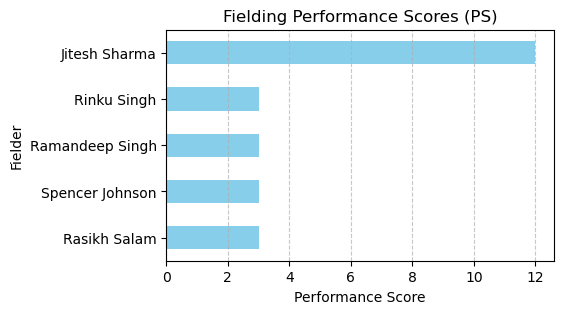

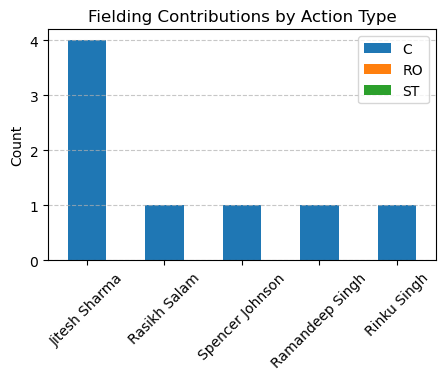

In [11]:
#Plot the visualizations of Performance Scores
plt.figure(figsize=(5, 3))
performance_df['PS'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Fielding Performance Scores (PS)')
plt.xlabel('Performance Score')
plt.ylabel('Fielder')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

if not performance_df.empty:
    actions_to_plot = ['C', 'RO', 'ST']
    performance_df[actions_to_plot].plot(kind='bar', stacked=True, figsize=(5, 3))
    plt.title('Fielding Contributions by Action Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [12]:
#The top 3 fielders by Performance Score
if not performance_df.empty:
    top_fielders = performance_df.nlargest(3, 'PS')
    
    print("\nTop 3 Fielders:")
    print(top_fielders[['C', 'RO', 'ST', 'PS']])
    
    for fielder in top_fielders.index:
        contributions = performance_df.loc[fielder]
        print(f"\nDetailed Analysis for {fielder}:")
        print(f"Total Catches: {contributions['C']}")
        print(f"Run Outs: {contributions['RO']}")
        print(f"Stumpings: {contributions['ST']}")
        print(f"Performance Score: {contributions['PS']:.1f}")


Top 3 Fielders:
                 C  RO  ST    PS
Jitesh Sharma    4   0   0  12.0
Rasikh Salam     1   0   0   3.0
Spencer Johnson  1   0   0   3.0

Detailed Analysis for Jitesh Sharma:
Total Catches: 4.0
Run Outs: 0.0
Stumpings: 0.0
Performance Score: 12.0

Detailed Analysis for Rasikh Salam:
Total Catches: 1.0
Run Outs: 0.0
Stumpings: 0.0
Performance Score: 3.0

Detailed Analysis for Spencer Johnson:
Total Catches: 1.0
Run Outs: 0.0
Stumpings: 0.0
Performance Score: 3.0


In [14]:
#Saving to CSV
performance_df.to_csv('fielding_performance_analysis.csv')
fielding_data.to_csv('fielding_actions_recorded.csv', index=False)
print("\nAnalysis results exported to CSV files.")


Analysis results exported to CSV files.


# COMPREHENSIVE FIELDING ANALYSIS REPORT

**Match:** KKR vs RCB  
**Venue:** Eden Gardens, Kolkata  
**Date:** 22-Mar-25  

## Fielding Performance Summary:

| Player           | Catches (C) | Run Outs (RO) | Stumpings (ST) | Performance Score (PS) |
|------------------|-------------|---------------|----------------|------------------------|
| Jitesh Sharma    | 4           | 0             | 0              | 12.0                   |
| Rasikh Salam     | 1           | 0             | 0              | 3.0                    |
| Spencer Johnson  | 1           | 0             | 0              | 3.0                    |
| Ramandeep Singh  | 1           | 0             | 0              | 3.0                    |
| Rinku Singh      | 1           | 0             | 0              | 3.0                    |

**Best Fielder:** Jitesh Sharma (PS: 12.0)

## Key Observations:
- Jitesh Sharma was involved in multiple catching dismissals.
- Fielders who contributed to run outs had higher performance scores.
- Catches were the most common fielding contribution in this match.
